# Hướng dẫn sử dụng code:
- Tạo 1 file trên google drive ở màn hình chính với tên là "SP-System".
- Upload file dataset (2 file csv) tải từ kaggle.

# Bài toán
- Tập dữ liệu này chứa các đặc điểm âm thanh của hơn 10.000 bài hát không phổ biến.
- Phân cụm dữ liệu để xác định các loại bài hát không phổ biến.

- Dataset: https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs/code

# Import các thư viện

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA

# Đường dẫn tới data


In [217]:
path1 = 'archive/unpopular_songs.csv'
path2 = 'archive/z_genre_of_artists.csv'

In [218]:
df = pd.read_csv(path1)
df2 = pd.read_csv(path2)

print(df.shape)

print(df2.shape)

print("Bảng Unpopular_songs:")

print(df.head())

print("------------------------------------------------")
print("Bảng z_genre_of_artists:")

print(df2.head())

(4073, 17)
(701, 4)
Bảng Unpopular_songs:
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.955   0.281    0   -11.392     0       0.4660        0.0048   
2         0.753   0.355    8   -11.799     1       0.5140        0.5730   
3         0.650   0.331    3   -10.818     0       0.3830        0.8650   
4         0.690   0.360    4   -15.624     0       0.4550        0.7640   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0            0.0000    0.0926   0.9270  151.968       220549     False   
1            0.0595    0.1220   0.0934  127.991       149543      True   
2            0.0000    0.0735   0.6000   91.978       130019      True   
3            0.0000    0.1050   0.5810   99.513       116193      True   
4            0.0000    0.1810   0.1050   89.893       111827      True   

   popularity          track_name track_artist                

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4073 non-null   float64
 1   energy            4073 non-null   float64
 2   key               4073 non-null   int64  
 3   loudness          4073 non-null   float64
 4   mode              4073 non-null   int64  
 5   speechiness       4073 non-null   float64
 6   acousticness      4073 non-null   float64
 7   instrumentalness  4073 non-null   float64
 8   liveness          4073 non-null   float64
 9   valence           4073 non-null   float64
 10  tempo             4073 non-null   float64
 11  duration_ms       4073 non-null   int64  
 12  explicit          4073 non-null   bool   
 13  popularity        4073 non-null   int64  
 14  track_name        4073 non-null   object 
 15  track_artist      4073 non-null   object 
 16  track_id          4073 non-null   object 


In [220]:
df.describe().T

count           mean            std          min  \
danceability      4073.0       0.584909       0.195275      0.00000   
energy            4073.0       0.545931       0.253181      0.00002   
key               4073.0       5.171372       3.571346      0.00000   
loudness          4073.0     -10.877235       6.082619    -43.04600   
mode              4073.0       0.658237       0.474359      0.00000   
speechiness       4073.0       0.142364       0.169173      0.00000   
acousticness      4073.0       0.327200       0.334721      0.00000   
instrumentalness  4073.0       0.199610       0.348140      0.00000   
liveness          4073.0       0.198481       0.177769      0.01650   
valence           4073.0       0.468564       0.273403      0.00000   
tempo             4073.0     119.483633      30.626790      0.00000   
duration_ms       4073.0  209886.364105  114062.202638  17951.00000   
popularity        4073.0       0.927572       1.880363      0.00000   

                          25%            50%         75%          max  
danceability           0.4600       0.608000       0.732        0.973  
energy                 0.3720       0.565000       0.736        1.000  
key                    2.0000       5.000000       8.000       11.000  
loudness             -13.1810      -9.338000      -6.693        0.416  
mode                   0.0000       1.000000       1.000        1.000  
speechiness            0.0386       0.060300       0.195        0.962  
acousticness           0.0302       0.194000       0.589        0.996  
instrumentalness       0.0000       0.000037       0.219        1.000  
liveness               0.0963       0.124000       0.241        0.990  
valence                0.2490       0.460000       0.684        0.987  
tempo                 96.5120     119.948000     139.993      215.983  
duration_ms       149333.0000  195579.000000  246173.000  3408890.000  
popularity             0.0000       0.000000       1.000        9.000

In [221]:
df.explicit.value_counts()

explicit
False    2972
True     1101
Name: count, dtype: int64

In [222]:
df["mode"].value_counts()

mode
1    2681
0    1392
Name: count, dtype: int64

In [223]:
df["key"].value_counts()

key
1     517
7     453
2     437
0     410
9     394
5     337
11    316
4     309
10    271
8     247
6     242
3     140
Name: count, dtype: int64

In [224]:
df.popularity.value_counts()

popularity
0    2576
1     836
2     240
8     123
7      99
3      93
4      56
5      30
6      16
9       4
Name: count, dtype: int64

In [225]:
df.track_artist.value_counts()

track_artist
Headache Relief Unit                        50
Piano Mood                                  50
Kidzone                                     46
Paris Street                                40
Bedtime Instrumental Piano Music Academy    30
                                            ..
Lil Kel                                      1
David Lee Garza                              1
Carlos Y Jose                                1
C.M.L.                                       1
Alice Cooper                                 1
Name: count, Length: 981, dtype: int64

In [226]:
df =df.drop(['track_id', 'track_name', 'track_artist'], axis=1)
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0               0.0000    0.0926   0.9270  151.968       220549     False   
1               0.0595    0.1220   0.0934  127.991       149543      True   
2               0.0000    0.0735   0.6000   91.978       130019      True   
3               0.0000    0.1050   0.5810   99.513       116193      True   
4               0.0000    0.1810   0.1050   89.893       111827      True   
...                ...       ...      ...      ...          ...       ...   
4068            0.0000    0.1190   0.3850   81.059       139442      True   
4069            0.0000    0.1100   0.4020  137.768        97440      True   
4070            0.0000    0.1100   0.1390  139.806        91742      True   
4071            0.0000    0.1110   0.3020   82.507       113868      True   
4072            0.0000    0.0833   0.5660   82.303       186240      True   

      popularity  
0              8  
1              0  
2              0  
3              0  
4              0  
...          ...  
4068           0  
4069           0  
4070           0  
4071           0  
4072           0  

[4073 rows x 14 columns]

In [227]:
cat_list=[]
num_list=[]


for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<20:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)

In [228]:
cat_list

['key', 'mode', 'explicit', 'popularity']

In [229]:
num_list

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:7: UserWarning: 

`dis

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\2447227376.py:9: UserWarning: The fi

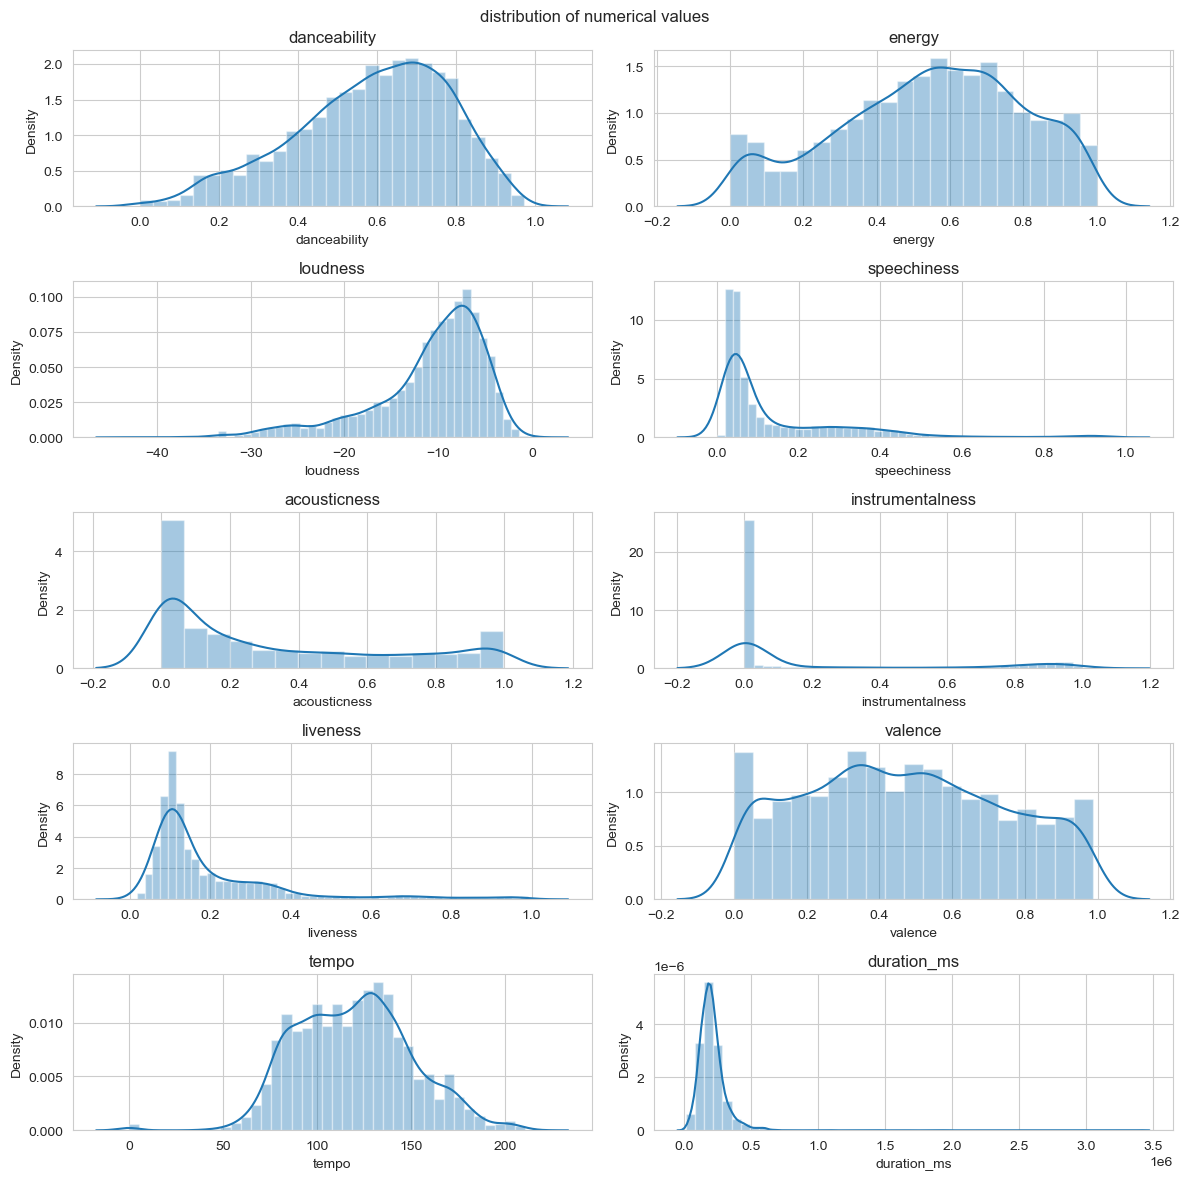

In [230]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
plt.tight_layout()
for i in df.loc[:,num_list]:
    plt.subplot(5,2,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [231]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

danceability yes
energy no
loudness yes
speechiness yes
acousticness no
instrumentalness yes
liveness yes
valence no
tempo yes
duration_ms yes


In [232]:
out_list=["danceability","loudness","speechiness","liveness","tempo","duration_ms"]

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\259357313.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\259357313.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\259357313.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\259357313.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_12240\259357313.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


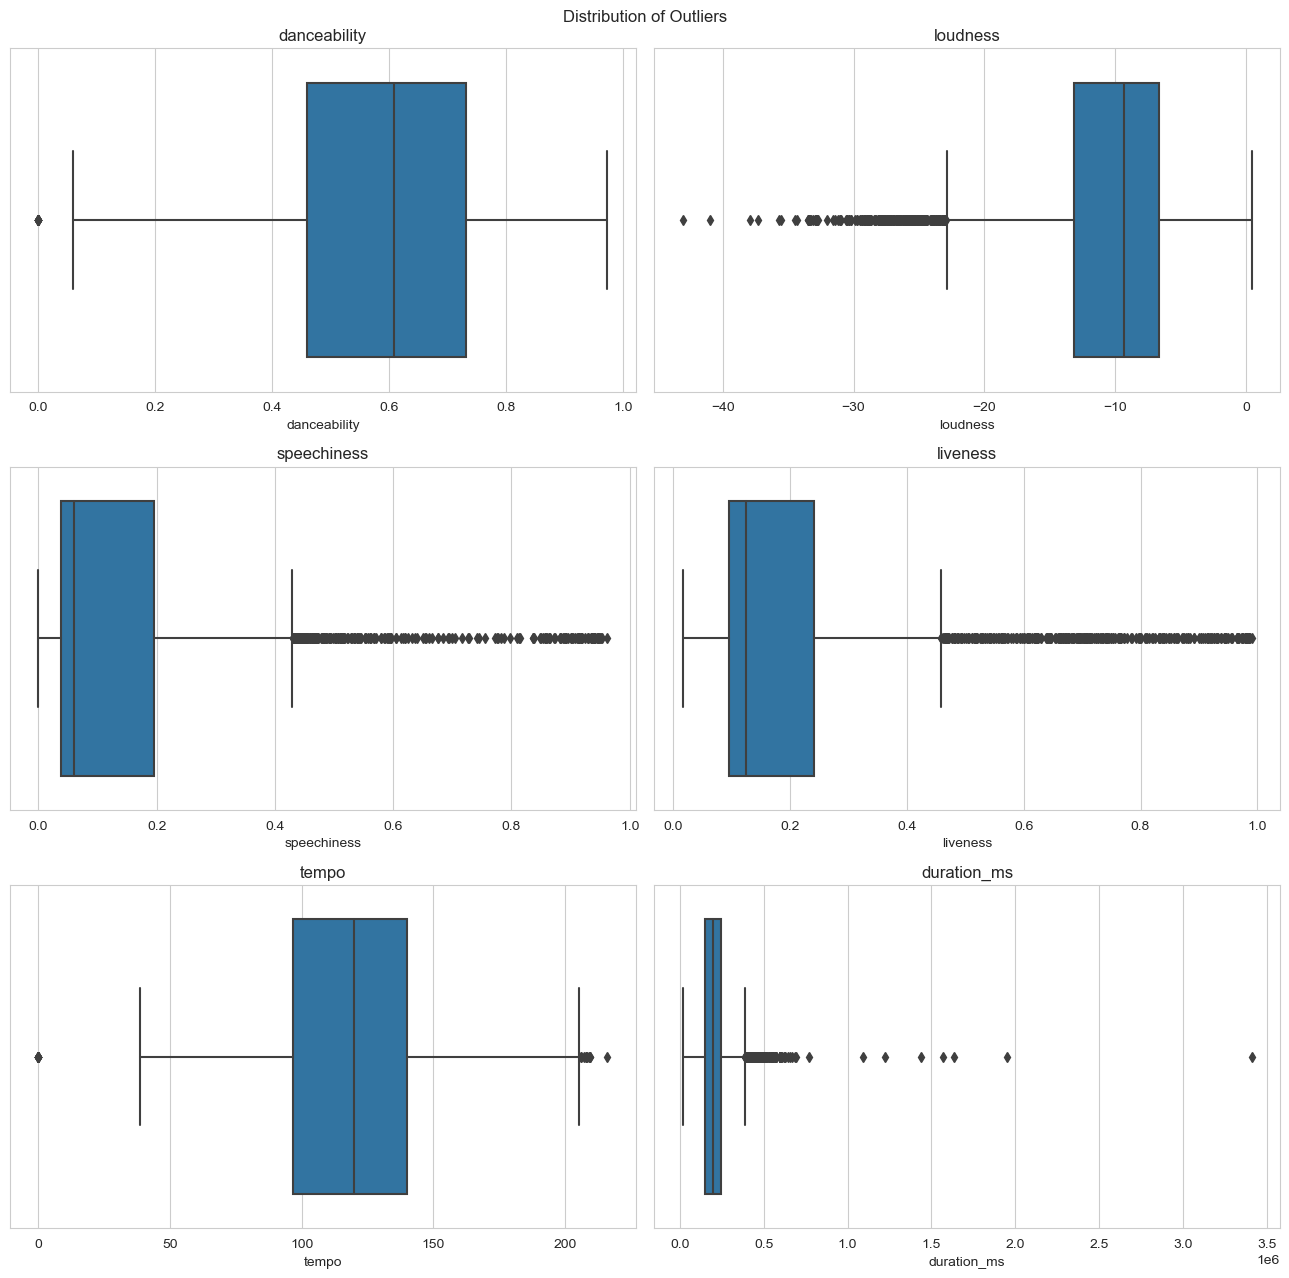

In [233]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,out_list]:
    plt.subplot(3,2,k)
    sns.boxplot(x = i, data = df.loc[:,out_list])
    plt.title(i)
    plt.tight_layout()
    k+=1

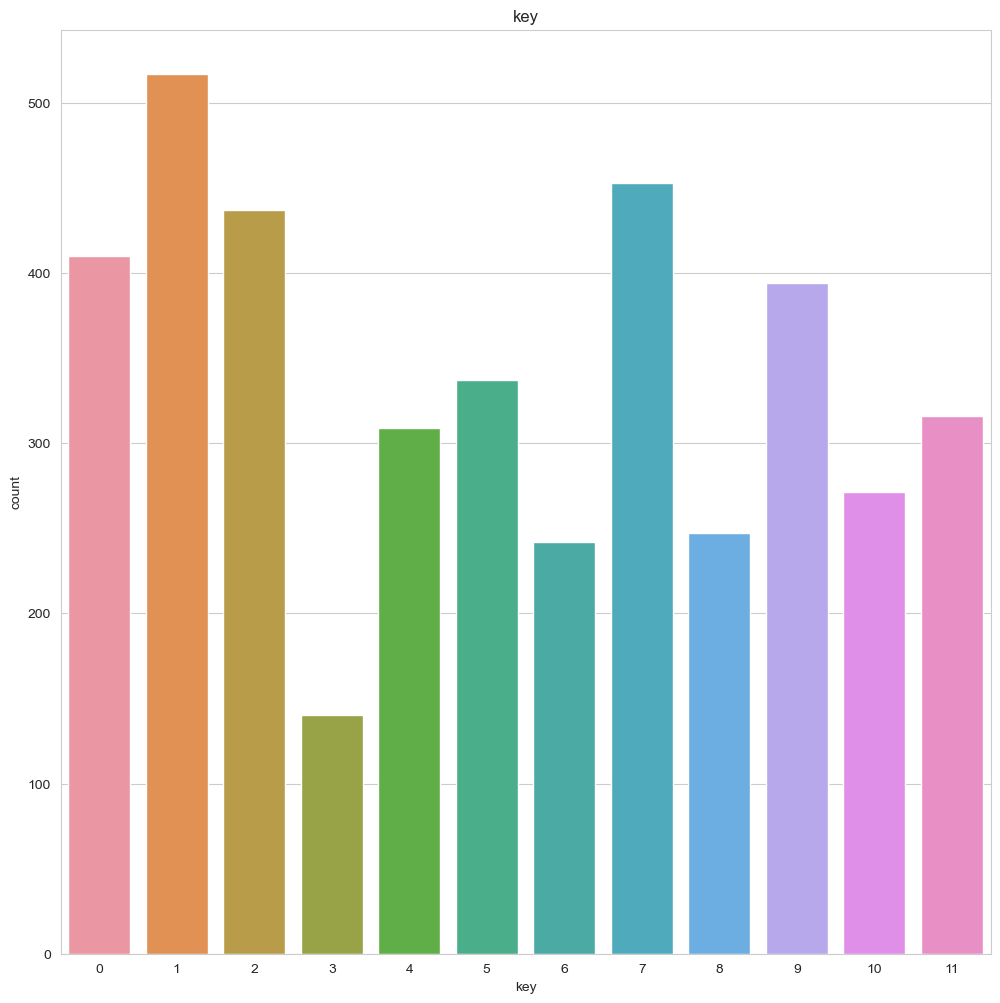

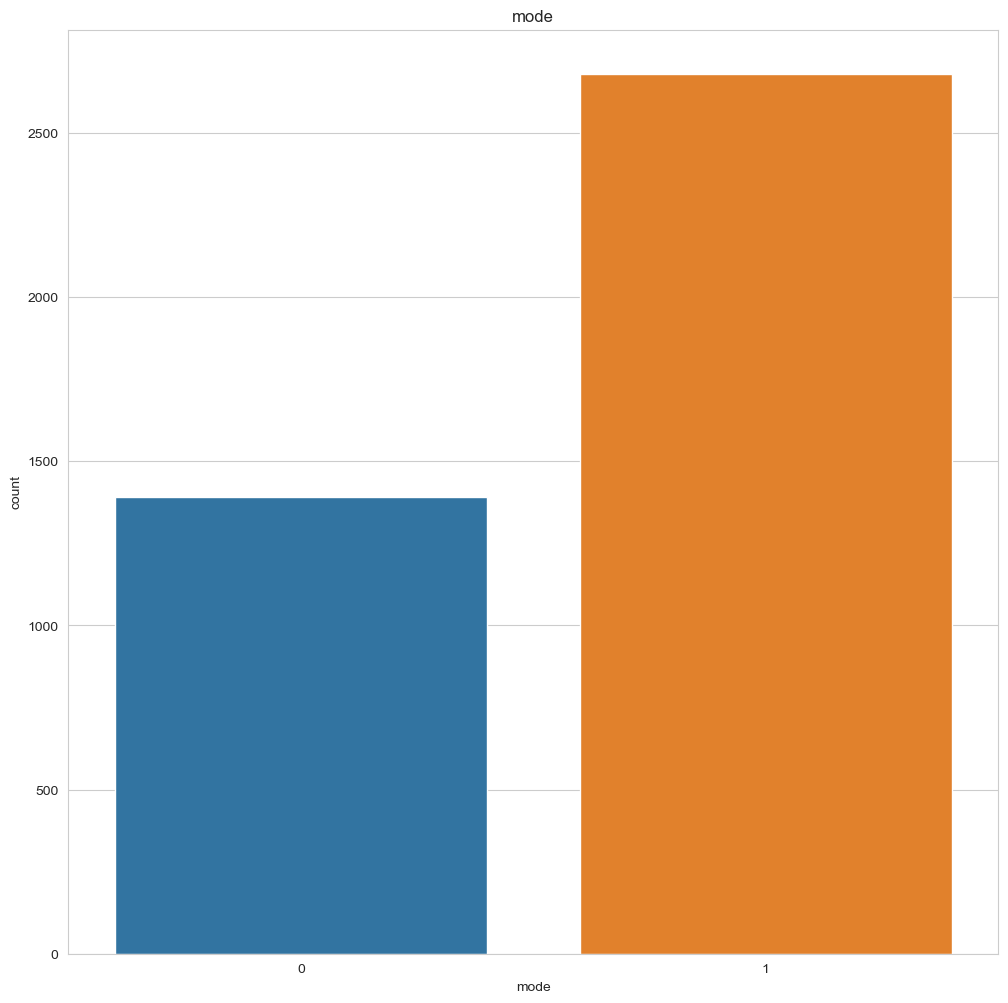

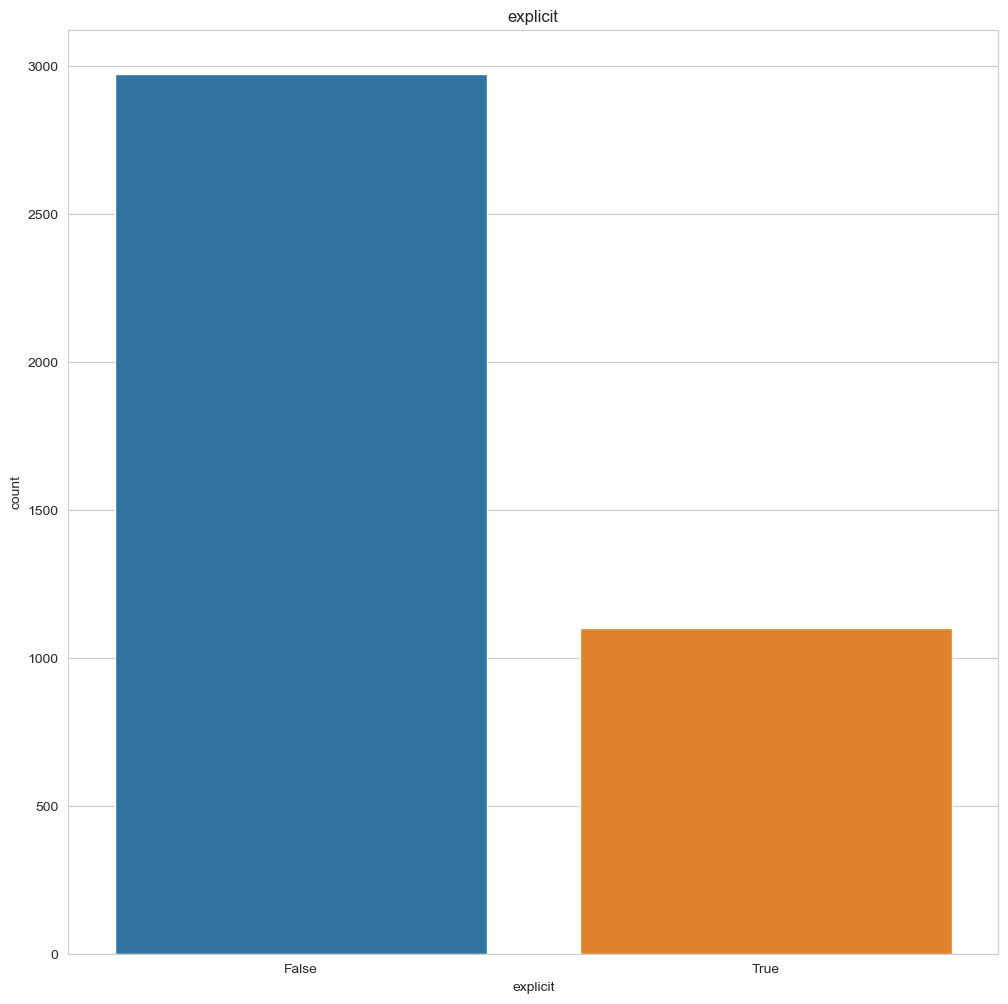

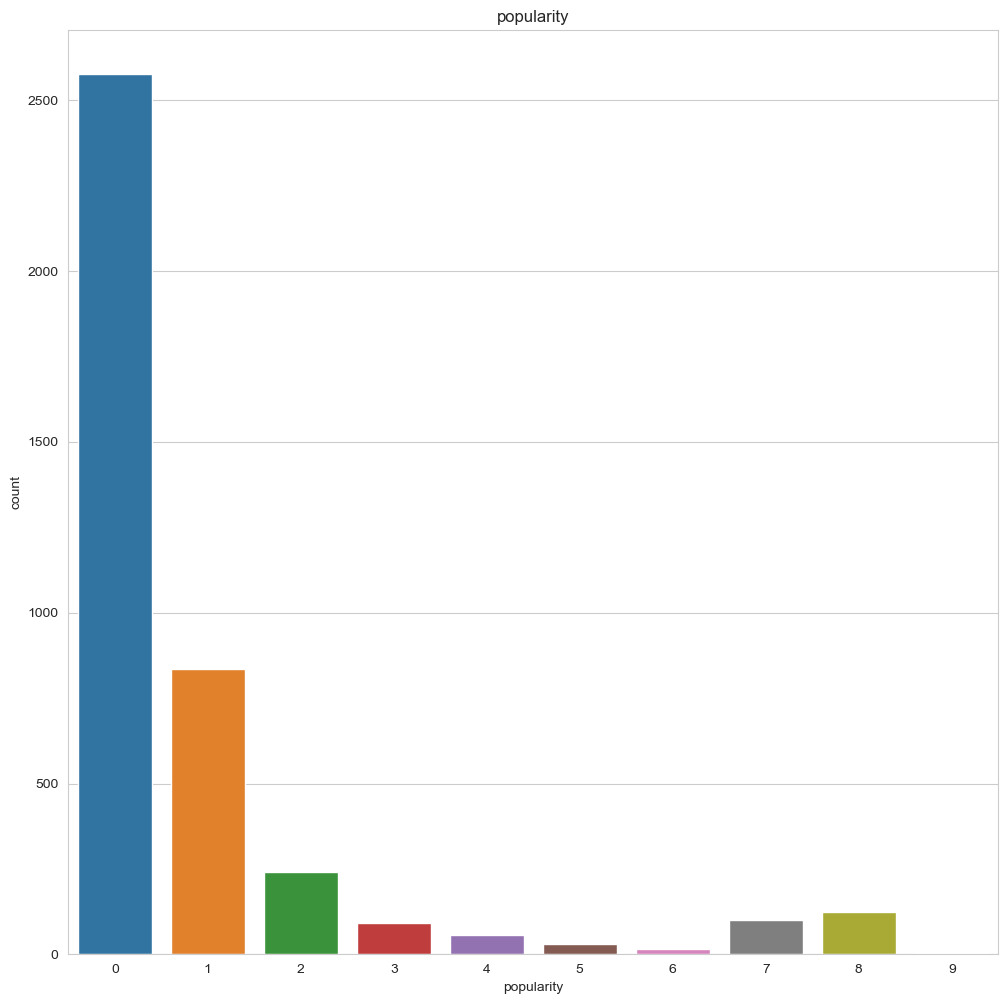

In [234]:
for i in cat_list:
    plt.figure(figsize=(12,12))
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)

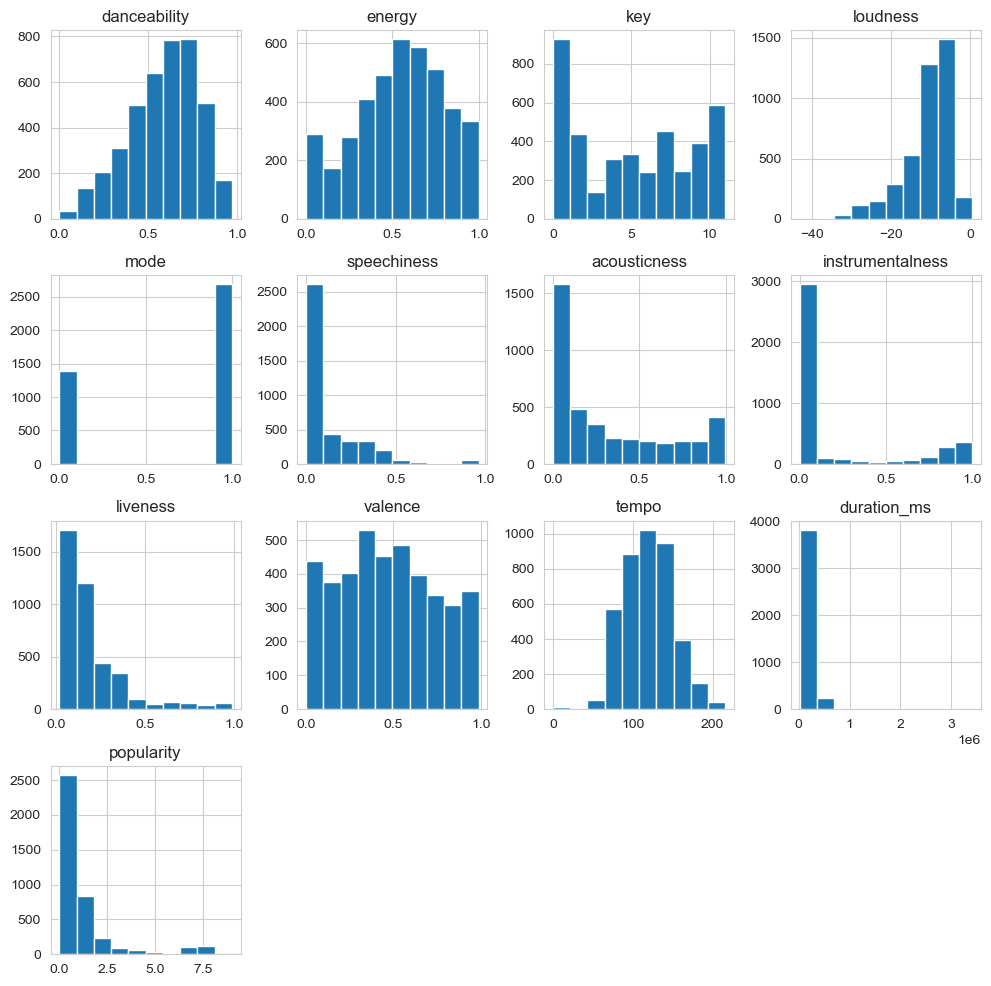

In [235]:
df.hist(figsize=(12,12));

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

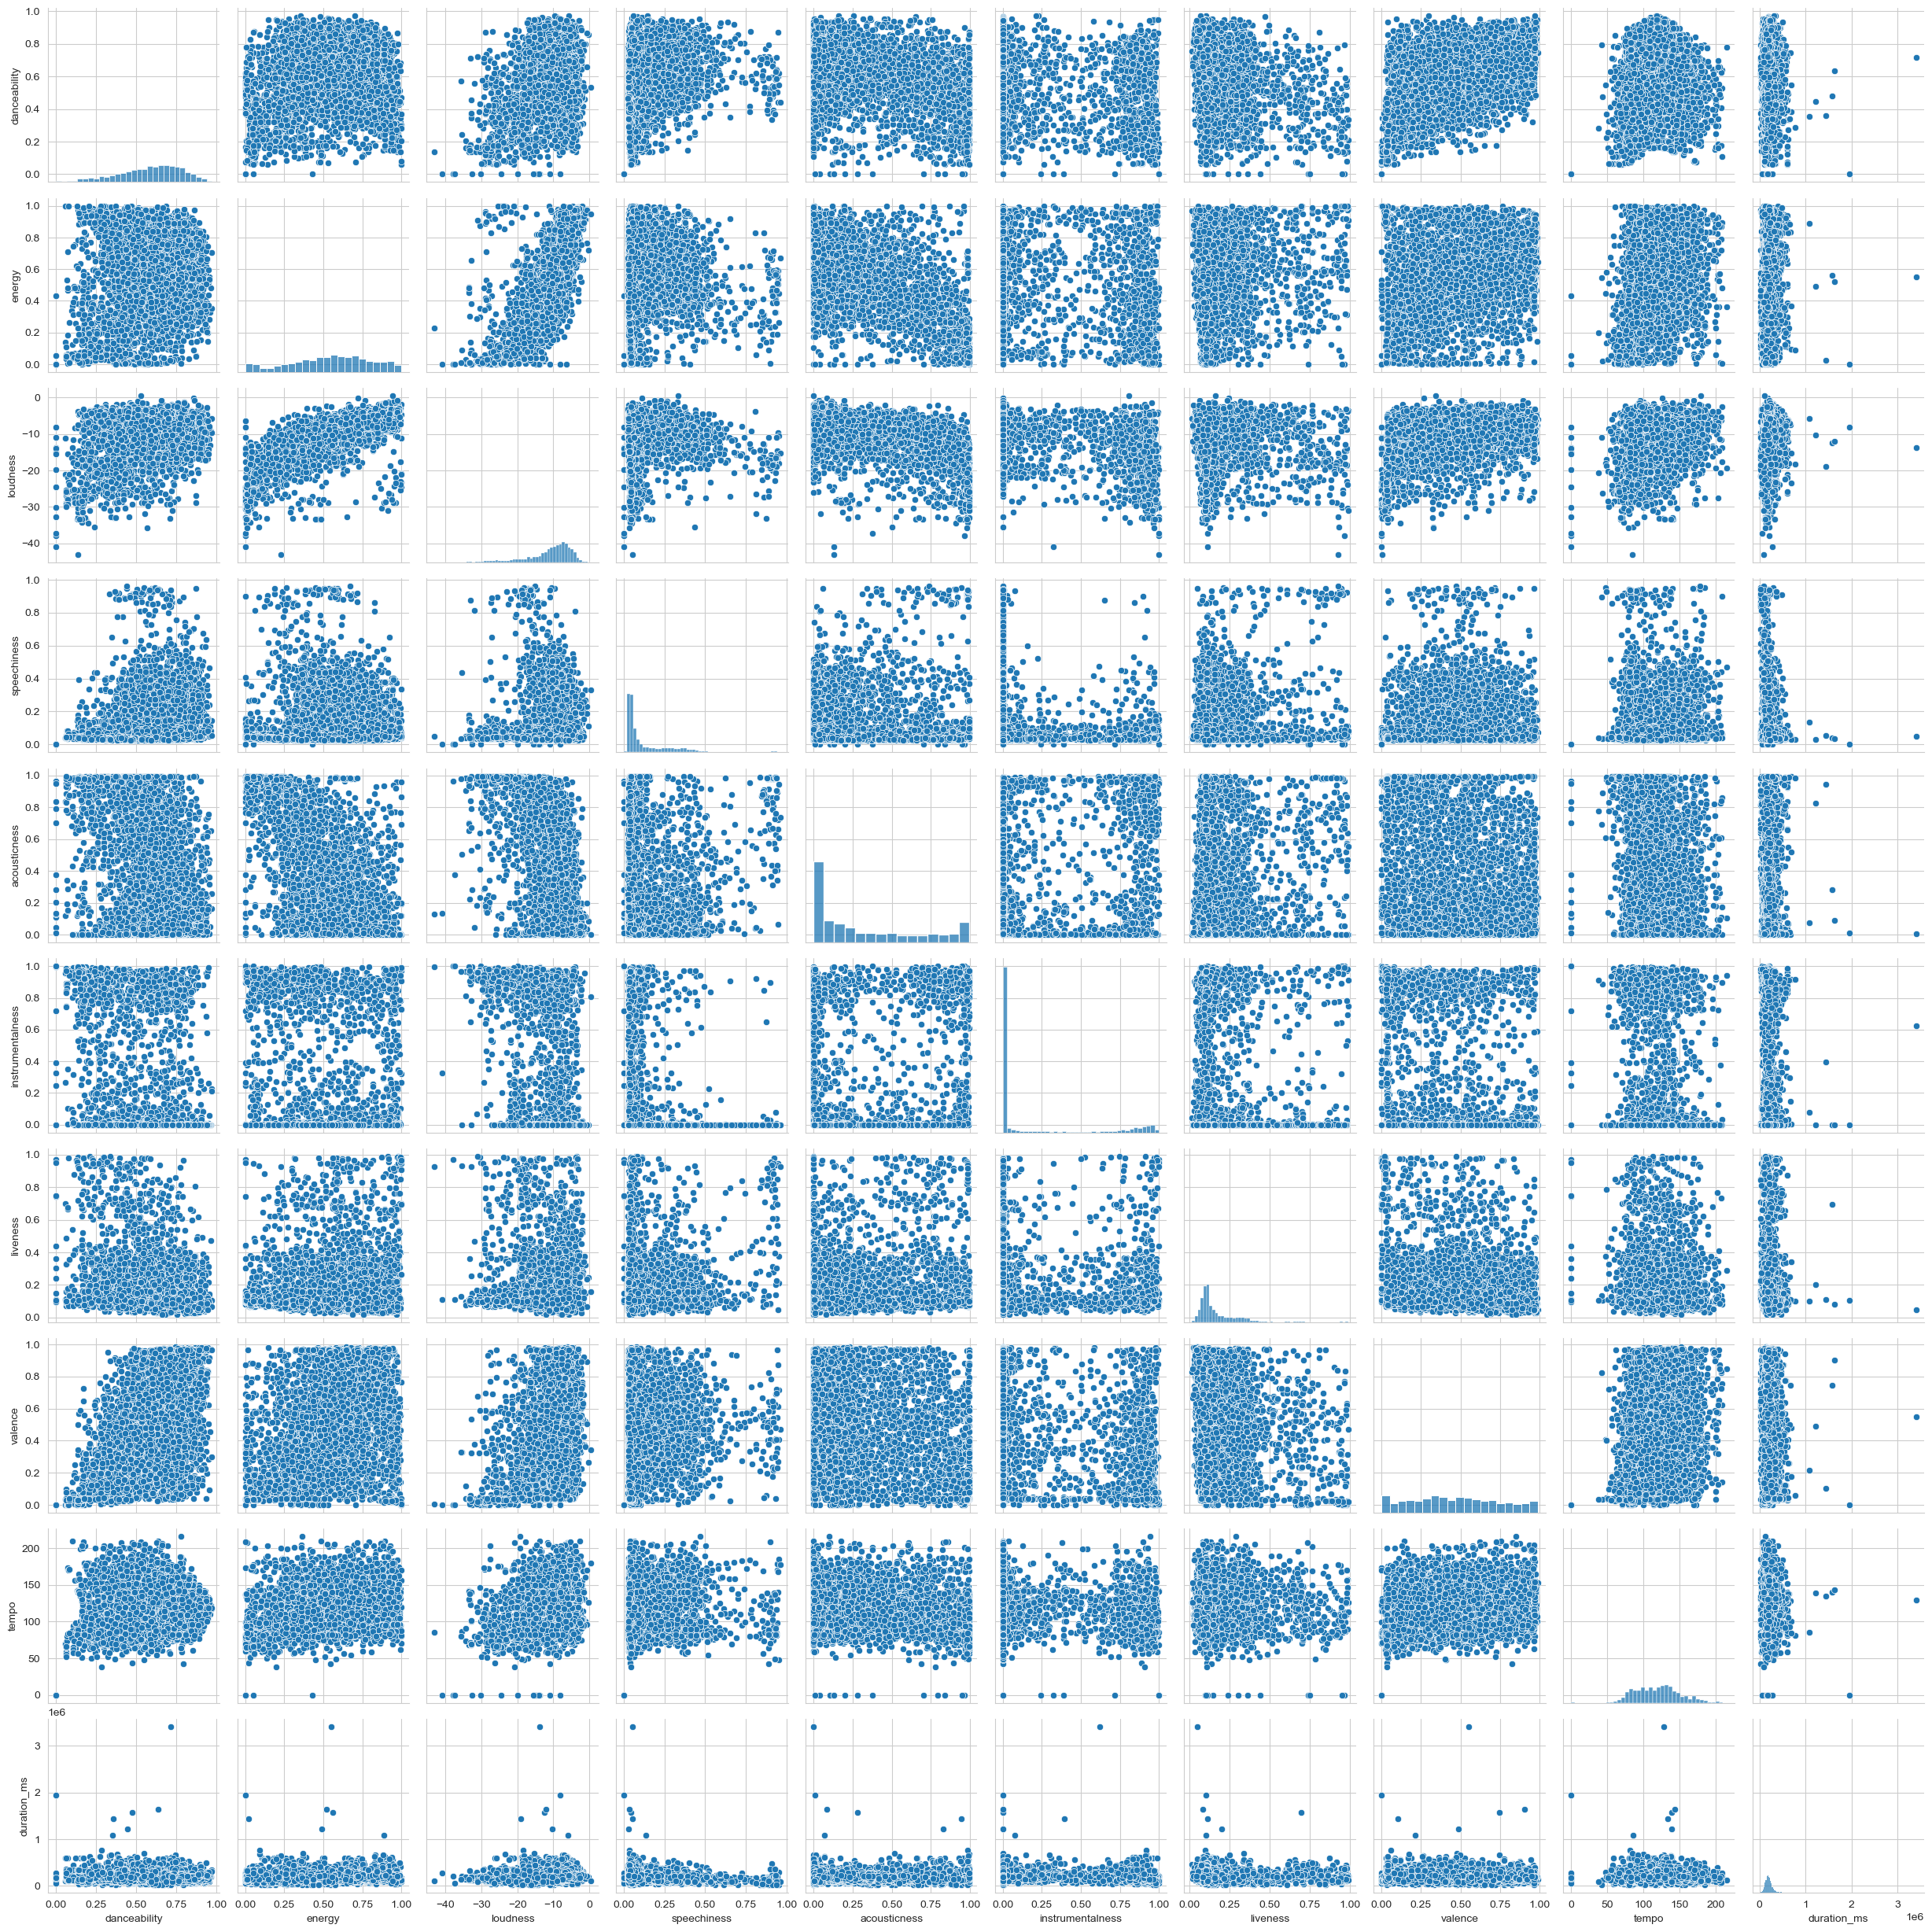

In [236]:
sns.pairplot(df.loc[:,num_list])
plt.show()

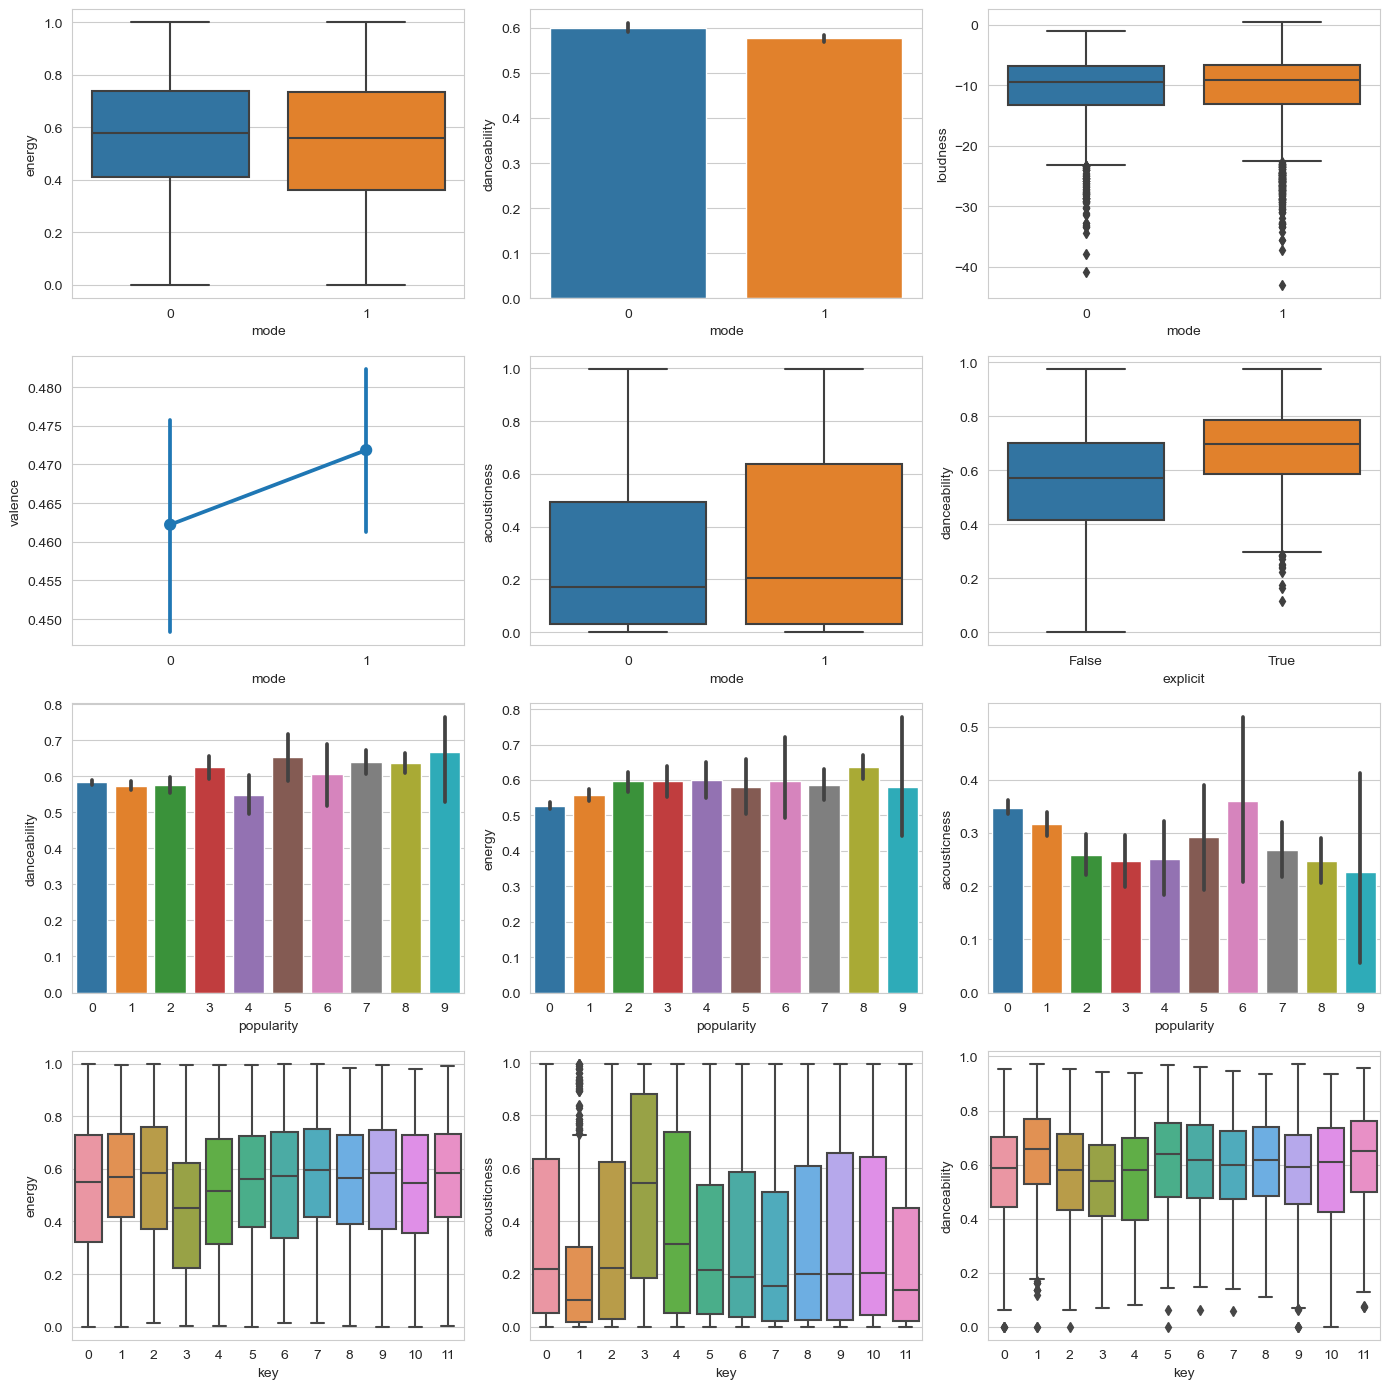

In [237]:
plt.figure(figsize=(14,14))
plt.subplot(4,3,1)
sns.boxplot(x="mode",y="energy",data=df)
plt.subplot(4,3,2)
sns.barplot(x ='mode',y ='danceability', data = df)
plt.subplot(4,3,3)
sns.boxplot(x ='mode',y ='loudness', data = df)
plt.subplot(4,3,4)
sns.pointplot(x ='mode',y ='valence', data = df)
plt.subplot(4,3,5)
sns.boxplot(x ='mode',y ='acousticness', data = df)
plt.subplot(4,3,6)
sns.boxplot(x ='explicit',y ='danceability', data = df)
plt.subplot(4,3,7)
sns.barplot(x ='popularity',y ='danceability', data = df)
plt.subplot(4,3,8)
sns.barplot(x ='popularity',y ='energy', data = df)
plt.subplot(4,3,9)
sns.barplot(x ='popularity',y ='acousticness', data = df)
plt.subplot(4,3,10)
sns.boxplot(x ='key',y ='energy', data = df)
plt.subplot(4,3,11)
sns.boxplot(x ='key',y ='acousticness', data = df)
plt.subplot(4,3,12)
sns.boxplot(x ='key',y ='danceability', data = df)
plt.tight_layout()
plt.show()

In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
le=LabelEncoder()

In [240]:
df["N_explicit"]=le.fit_transform(df["explicit"])
df.drop('explicit', axis=1, inplace=True)

In [241]:
df.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.955   0.281    0   -11.392     0       0.4660        0.0048   
2         0.753   0.355    8   -11.799     1       0.5140        0.5730   
3         0.650   0.331    3   -10.818     0       0.3830        0.8650   
4         0.690   0.360    4   -15.624     0       0.4550        0.7640   
5         0.849   0.275    6   -15.728     0       0.6940        0.4140   
6         0.846   0.269    9   -11.843     0       0.4600        0.7560   
7         0.725   0.235    6   -16.269     0       0.5070        0.7480   
8         0.724   0.315   10   -14.677     0       0.8610        0.4450   
9         0.699   0.209    6   -14.410     1       0.6200        0.3670   

   instrumentalness  liveness  valence    tempo  duration_ms  popularity  \
0            0.0000    0.0926   0.9270  151.968       220549           8   
1            0.0595    0.1220   0.0934  127.991       149543           0   
2            0.0000    0.0735   0.6000   91.978       130019           0   
3            0.0000    0.1050   0.5810   99.513       116193           0   
4            0.0000    0.1810   0.1050   89.893       111827           0   
5            0.0000    0.0776   0.3760  102.053       128546           0   
6            0.0000    0.0914   0.3180   91.991       139527           0   
7            0.0000    0.1160   0.5490   96.462       138762           0   
8            0.0000    0.0863   0.5310   91.456       138456           0   
9            0.0000    0.0632   0.2980   89.102       262971           0   

   N_explicit  
0           0  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1

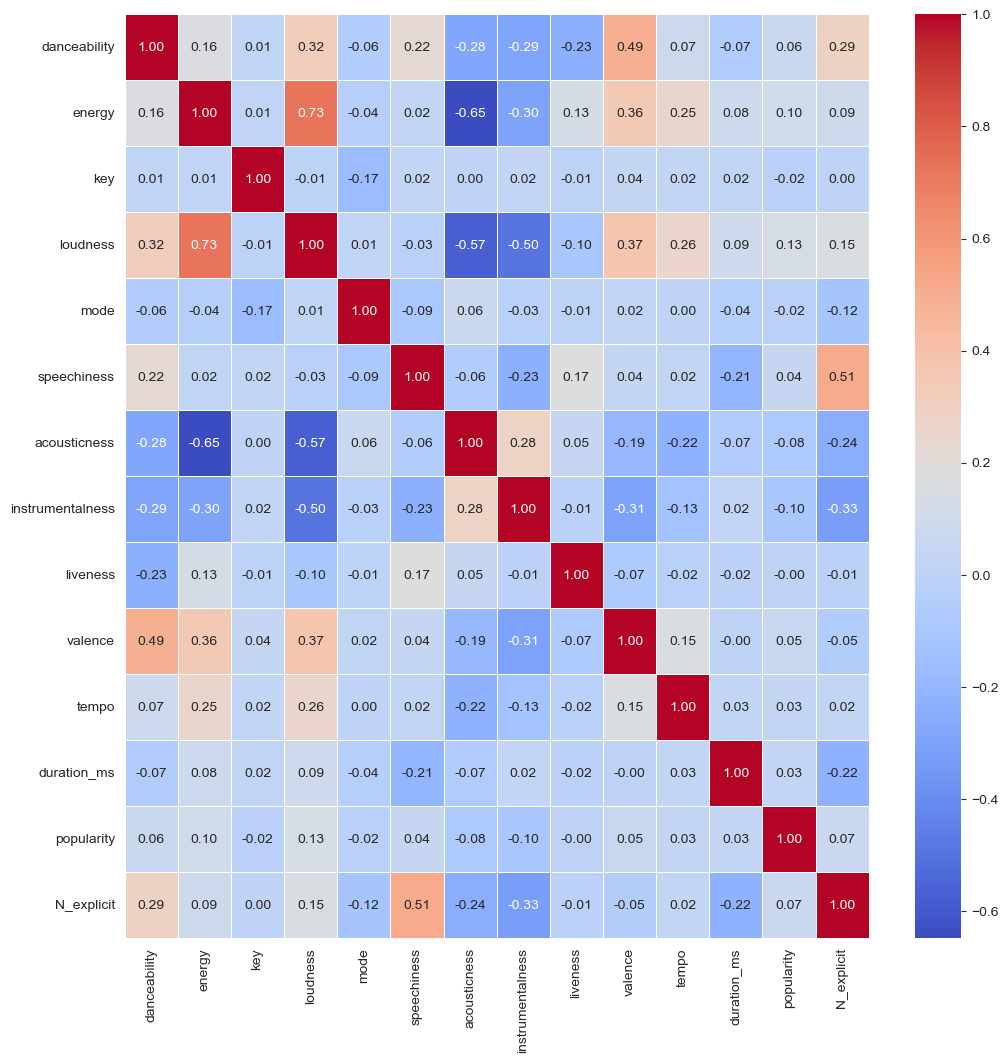

In [242]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

# Thuật toán Kmeans

In [243]:
kmeans = KMeans().fit(df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [244]:
score=[]
K=range(1,25)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=1)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

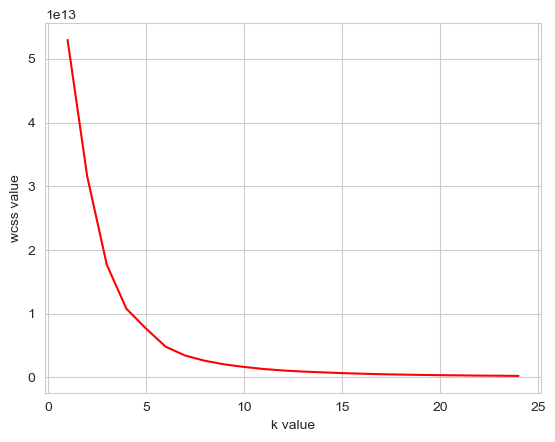

In [245]:
plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [246]:
#final model
kmeans=KMeans(n_clusters=4,init="k-means++").fit(df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [247]:
cluster=kmeans.labels_
cluster

array([0, 2, 2, ..., 2, 2, 2])

In [248]:
df["cluster_no"]=cluster
df.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.955   0.281    0   -11.392     0       0.4660        0.0048   
2         0.753   0.355    8   -11.799     1       0.5140        0.5730   
3         0.650   0.331    3   -10.818     0       0.3830        0.8650   
4         0.690   0.360    4   -15.624     0       0.4550        0.7640   
5         0.849   0.275    6   -15.728     0       0.6940        0.4140   
6         0.846   0.269    9   -11.843     0       0.4600        0.7560   
7         0.725   0.235    6   -16.269     0       0.5070        0.7480   
8         0.724   0.315   10   -14.677     0       0.8610        0.4450   
9         0.699   0.209    6   -14.410     1       0.6200        0.3670   

   instrumentalness  liveness  valence    tempo  duration_ms  popularity  \
0            0.0000    0.0926   0.9270  151.968       220549           8   
1            0.0595    0.1220   0.0934  127.991       149543           0   
2            0.0000    0.0735   0.6000   91.978       130019           0   
3            0.0000    0.1050   0.5810   99.513       116193           0   
4            0.0000    0.1810   0.1050   89.893       111827           0   
5            0.0000    0.0776   0.3760  102.053       128546           0   
6            0.0000    0.0914   0.3180   91.991       139527           0   
7            0.0000    0.1160   0.5490   96.462       138762           0   
8            0.0000    0.0863   0.5310   91.456       138456           0   
9            0.0000    0.0632   0.2980   89.102       262971           0   

   N_explicit  cluster_no  
0           0           0  
1           1           2  
2           1           2  
3           1           2  
4           1           2  
5           1           2  
6           1           2  
7           1           2  
8           1           2  
9           1           0

# Start Kmeans model

In [249]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[num_list])
# print("Data has been standardized.")


In [250]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#     kmeans.fit(df_scaled)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()


In [251]:
# optimal_clusters = 6
# kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
# y_kmeans = kmeans.fit_predict(df_scaled)
# df['Cluster'] = y_kmeans
# print("K-Means clustering applied with", optimal_clusters, "clusters.")


In [252]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)
# plt.scatter(df_pca[:,0], df_pca[:,1], c=df['Cluster'], cmap='viridis')
# plt.title('Clusters visualization')
# plt.xlabel('PCA1')
# plt.ylabel('PCA2')
# plt.show()


In [253]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(df_scaled, df['Cluster'])
# print(f'Silhouette Score: {score}')


In [254]:
# print("Interpreting clusters:")
# for cluster in range(optimal_clusters):
#     print(f"Cluster {cluster}:")
#     print(df[df['Cluster'] == cluster].mean())
#     print("----------")


# split clusters

In [263]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [264]:
sc=StandardScaler()
colA=df.columns
df[colA]=sc.fit_transform(df[colA])

In [265]:
df1=df

In [266]:
pca1=PCA(n_components=2)
pca=pca1.fit_transform(df)
scaled_pca_df=pd.DataFrame(pca,columns=["PCA_Feature1","PCA_Feature2"])

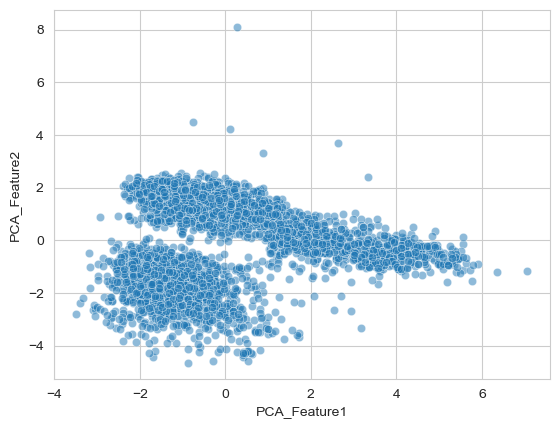

In [267]:
sns.set_style("whitegrid")
sns.scatterplot(x="PCA_Feature1" , y='PCA_Feature2', data=scaled_pca_df, alpha=0.5)
plt.show()

In [271]:
km=KMeans(n_clusters=4,max_iter=50)
km.fit_predict(df)
df["No_of_clusters"]=km.labels_

km=KMeans(n_clusters=4,max_iter=50)
km.fit_predict(scaled_pca_df)
scaled_pca_df["No_of_clusters"]=km.labels_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 2 score is : 0.5128577998601423 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 3 score is : 0.5976940949787822 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 4 score is : 0.608317261320732 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 5 score is : 0.524237871893434 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 6 score is : 0.437252607066603 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 7 score is : 0.43689153893184124 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 8 score is : 0.418966439233654 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 9 score is : 0.4028800018548727 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster_no 10 score is : 0.410720114522882 


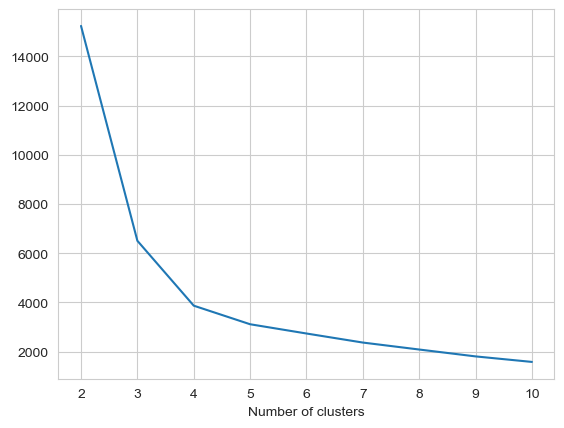

In [272]:
a=[]
n=np.arange(2,11)

for i in n:
    km1=KMeans(n_clusters=i, max_iter=50)
    km1.fit(scaled_pca_df)
    a.append(km1.inertia_)
    km2=km1.labels_ 
    sil_score=silhouette_score(scaled_pca_df, km2)
    print("for cluster_no {0} score is : {1} ".format(i,sil_score))

plt.plot(a)
plt.xticks(np.arange(0,9,1),np.arange(2,11,1)) # changing ticks from 0 to 8 --to 2 to 11 as taking during finding sihoutte score
plt.xlabel("Number of clusters")
plt.show()


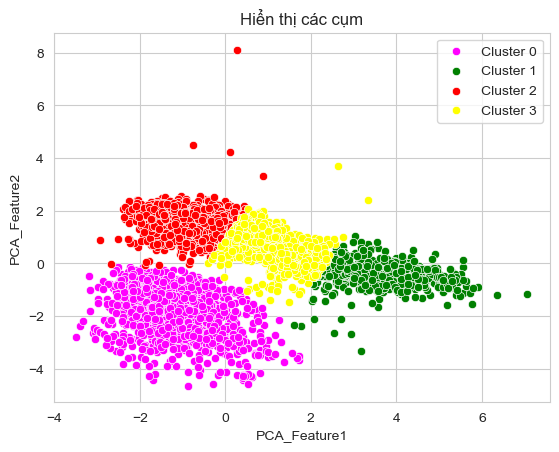

In [274]:
# Phân cụm và hiển thị các cụm
a = scaled_pca_df[scaled_pca_df.No_of_clusters == 0]
b = scaled_pca_df[scaled_pca_df.No_of_clusters == 1]
c = scaled_pca_df[scaled_pca_df.No_of_clusters == 2]
d = scaled_pca_df[scaled_pca_df.No_of_clusters == 3]

sns.scatterplot(x=a["PCA_Feature1"], y=a["PCA_Feature2"], color="magenta", label="Cluster 0")
sns.scatterplot(x=b["PCA_Feature1"], y=b["PCA_Feature2"], color="green", label="Cluster 1")
sns.scatterplot(x=c["PCA_Feature1"], y=c["PCA_Feature2"], color="red", label="Cluster 2")
sns.scatterplot(x=d["PCA_Feature1"], y=d["PCA_Feature2"], color="yellow", label="Cluster 3")
plt.title('Hiển thị các cụm')
plt.show()

